In [1]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
print('Number of replicas:', strategy.num_replicas_in_sync)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
train=pd.read_csv('../input/contradictory-my-dear-watson/train.csv')
test=pd.read_csv('../input/contradictory-my-dear-watson/test.csv')

In [4]:
train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


In [6]:
train.id.nunique()

12120

In [7]:
train.language.nunique()

15

In [8]:
train.language.unique()

array(['English', 'French', 'Thai', 'Turkish', 'Urdu', 'Russian',
       'Bulgarian', 'German', 'Arabic', 'Chinese', 'Hindi', 'Swahili',
       'Vietnamese', 'Spanish', 'Greek'], dtype=object)

<AxesSubplot:xlabel='label', ylabel='count'>

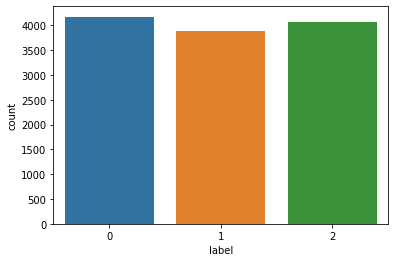

In [9]:
sns.countplot(x='label',data=train)

<AxesSubplot:xlabel='language', ylabel='count'>

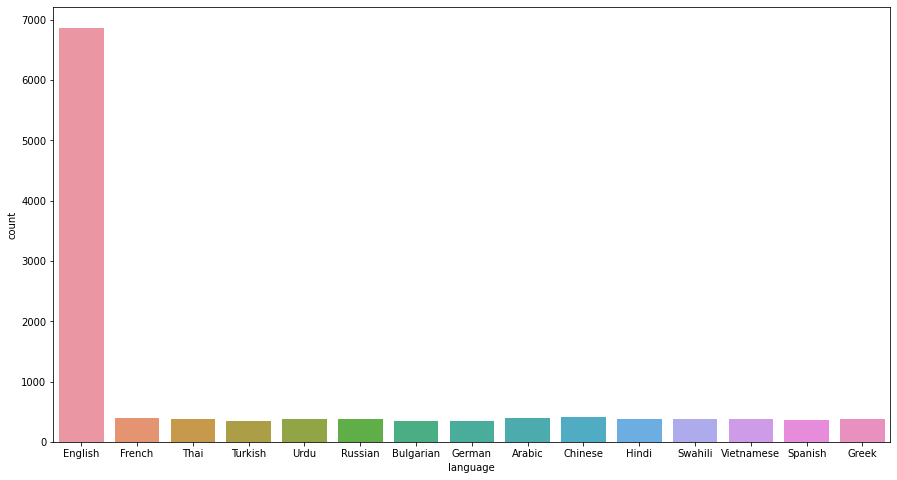

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='language',data=train)

<AxesSubplot:xlabel='lang_abv', ylabel='count'>

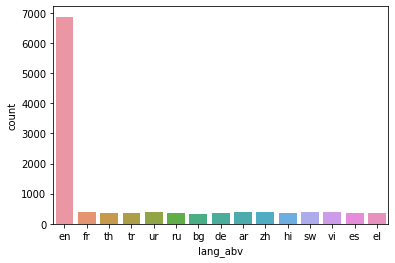

In [11]:
sns.countplot(x='lang_abv',data=train)

In [12]:
df_train_en = train.loc[train.language=='English'].copy()
print(df_train_en.shape)
df_train_fr = train.loc[train.language=='French'].copy()
print(df_train_fr.shape)
df_train_th = train.loc[train.language=='Thai'].copy()
print(df_train_th.shape)
df_train_tr = train.loc[train.language=='Turkish'].copy()
print(df_train_tr.shape)
df_train_ur = train.loc[train.language=='Urdu'].copy()
print(df_train_ur.shape)
df_train_ru = train.loc[train.language=='Russian'].copy()
print(df_train_ru.shape)
df_train_bg = train.loc[train.language=='Bulgarian'].copy()
print(df_train_bg.shape)
df_train_de = train.loc[train.language=='German'].copy()
print(df_train_de.shape)
df_train_ar = train.loc[train.language=='Arabic'].copy()
print(df_train_ar.shape)
df_train_zh = train.loc[train.language=='Chinese'].copy()
print(df_train_zh.shape)
df_train_hi = train.loc[train.language=='Hindi'].copy()
print(df_train_hi.shape)
df_train_sw = train.loc[train.language=='Swahili'].copy()
print(df_train_sw.shape)
df_train_vi = train.loc[train.language=='Vietnamese'].copy()
print(df_train_vi.shape)
df_train_es = train.loc[train.language=='Spanish'].copy()
print(df_train_es.shape)
df_train_ei = train.loc[train.language=='Greek'].copy()
print(df_train_ei.shape)

(6870, 6)
(390, 6)
(371, 6)
(351, 6)
(381, 6)
(376, 6)
(342, 6)
(351, 6)
(401, 6)
(411, 6)
(374, 6)
(385, 6)
(379, 6)
(366, 6)
(372, 6)


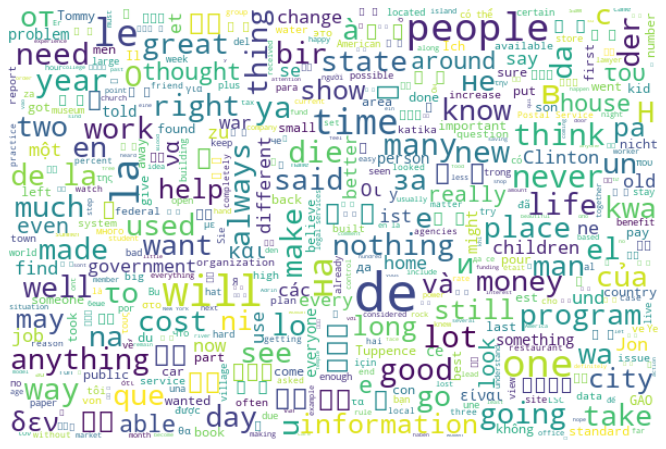

In [13]:
text = " ".join(txt for txt in train.hypothesis)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

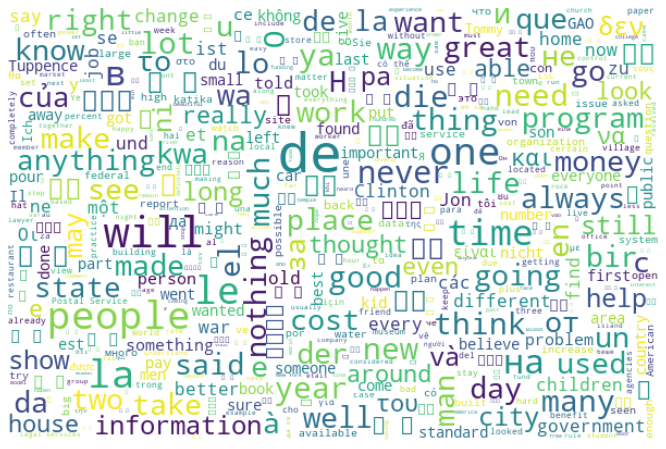

In [14]:
text = " ".join(txt for txt in train.hypothesis)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
train['premise_len'] = pd.to_numeric(list(map(len, train.premise)))
train['hypothesis_len'] = pd.to_numeric(list(map(len, train.hypothesis)))

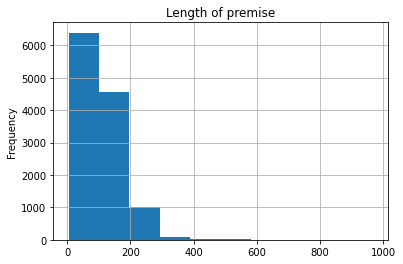

In [16]:
train.premise_len.plot(kind='hist')
plt.title('Length of premise')
plt.grid()
plt.show()

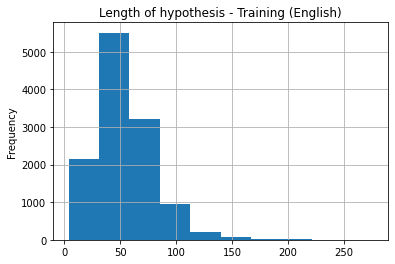

In [17]:
train.hypothesis_len.plot(kind='hist')
plt.title('Length of hypothesis - Training (English)')
plt.grid()
plt.show()

In [18]:
train.duplicated().sum()

0

In [19]:
print(train.shape)
print(test.shape)

(12120, 8)
(5195, 5)


In [20]:
train.head()

,id,premise,hypothesis,lang_abv,language,label,premise_len,hypothesis_len
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0,68,81
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2,81,58
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0,92,37
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0,92,50
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,182,47


In [21]:
test.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [22]:
train.label.value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

In [23]:
#!pip install transformers
from transformers import TFAutoModel,AutoTokenizer
import tensorflow as tf
#!pip install sentencepiece

In [24]:
tokenizer=AutoTokenizer.from_pretrained('joeddav/xlm-roberta-large-xnli')
train_enc=tokenizer.batch_encode_plus(train[['premise','hypothesis']].values.tolist(),padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
test_enc=tokenizer.batch_encode_plus(test[['premise','hypothesis']].values.tolist(),padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
train_tf1=tf.convert_to_tensor(train_enc['input_ids'],dtype=tf.int32)
train_tf2=tf.convert_to_tensor(train_enc['attention_mask'],dtype=tf.int32)
train_input={'input_word_ids':train_tf1,'input_mask':train_tf2}
test_tf1=tf.convert_to_tensor(test_enc['input_ids'],dtype=tf.int32)
test_tf2=tf.convert_to_tensor(test_enc['attention_mask'],dtype=tf.int32)
test_input={'input_word_ids':test_tf1,'input_mask':test_tf2}

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

In [25]:
train_enc[100]

Encoding(num_tokens=100, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [26]:
with strategy.scope():
    input_ids = tf.keras.Input(shape = (100,), dtype = tf.int32,name='input_word_ids') 
    input_mask=tf.keras.Input(shape=(100,),dtype=tf.int32,name='input_mask')    
    roberta = TFAutoModel.from_pretrained('joeddav/xlm-roberta-large-xnli')
    roberta = roberta([input_ids,input_mask])[0]
    out = tf.keras.layers.GlobalAveragePooling1D()(roberta)
    out = tf.keras.layers.Dense(3, activation = 'softmax')(out)
    model = tf.keras.Model(inputs = [input_ids,input_mask], outputs = out)
    model.compile(
                        optimizer = tf.keras.optimizers.Adam(lr = 1e-5), 
                        loss = 'sparse_categorical_crossentropy', 
                        metrics = ['accuracy']) 
    model.summary()

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some layers from the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing TFXLMRobertaModel: ['classifier']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at joeddav/xlm-roberta-large-xnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 100)]        0                                            
__________________________________________________________________________________________________
tfxlm_roberta_model (TFXLMRober TFBaseModelOutputWit 559890432   input_word_ids[0][0]             
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 1024)         0           tfxlm_roberta_model[0][0]    

In [27]:
strategy.num_replicas_in_sync

8

In [28]:
es=tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history_xlm=model.fit(train_input,train.label,validation_split=0.2,epochs=20,batch_size=10*strategy.num_replicas_in_sync,callbacks=[es],verbose=1)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:430: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256002048 elements. This may consume a large amount of memory.
  num_elements)


122/122 [==============================] - 269s 1s/step - loss: 0.2864 - accuracy: 0.9062 - val_loss: 0.2408 - val_accuracy: 0.9233
Epoch 2/20
122/122 [==============================] - 27s 218ms/step - loss: 0.1317 - accuracy: 0.9540 - val_loss: 0.2822 - val_accuracy: 0.9204
Epoch 3/20
122/122 [==============================] - 27s 218ms/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.3104 - val_accuracy: 0.9183


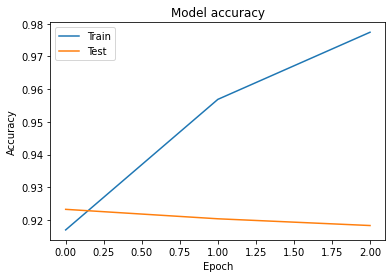

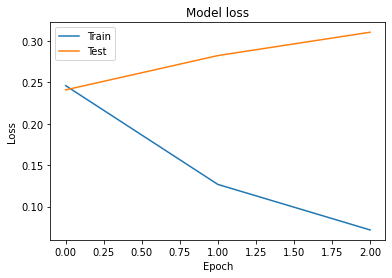

In [29]:
plt.plot(history_xlm.history['accuracy'])
plt.plot(history_xlm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_xlm.history['loss'])
plt.plot(history_xlm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
pred=[np.argmax(i) for i in model.predict(test_input)]
pd.DataFrame(pred).value_counts()

0    1859
2    1689
1    1647
dtype: int64

In [31]:
pd.DataFrame({'id':test.id,
              'prediction':pred}).to_csv('submission.csv',index=False)